# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the libraries
import numpy as np
import pandas as pd

In [5]:
# Setting display option to maximum rows and columns for better readability 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### **1.1 Load the Data**

In [7]:
# Load the dataset
emp=pd.read_csv('Employee_data.csv')

In [9]:
# Check the first few entries
emp.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  Distance from Home      Education Level Marital Status  \
0       No                22.0     Associate Degree        Married   
1       No                21.0    Masterâ€™s Degree       Divorced   
2       No                11.0  Bachelorâ€™s Degree        Married   
3       No                27.0          High School         Single   
4      Yes                71.0          High School       Divorced   

   Number of Dependents Job Level Company Size  Company Tenure (In Months)  \
0                     0       Mid       Medium                        89.0   
1                     3       Mid       Medium                        21.0   
2                     3       Mid       Medium                        74.0   
3                     2       Mid        Small                        50.0   
4                     0    Senior       Medium                        68.0   

  Remote Work Leadership Opportunities Innovation Opportunities  \
0          No                       No                       No   
1          No                       No                       No   
2          No                       No                       No   
3         Yes                       No                       No   
4          No                       No                       No   

  Company Reputation Employee Recognition Attrition  
0          Excellent               Medium    Stayed  
1               Fair                  Low    Stayed  
2               Poor                  Low    Stayed  
3               Good               Medium    Stayed  
4               Fair               Medium    Stayed

In [11]:
# Inspect the shape of the dataset -24 Columns and 74610 Rows
emp.shape

(74610, 24)

In [13]:
# Inspect the different columns in the dataset
emp.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [15]:
# Splitting numerical and categorical columns for easier analysis 
cat_cols = ['Employee ID', 'Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
    'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level',
    'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
    'Company Reputation', 'Employee Recognition', 'Attrition']

num_cols = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
    'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']


In [17]:
# Creating a copy of dataframe and verifying its dimensions before proceeding
df=emp.copy()
df.shape

(74610, 24)

### **1.2 Check the basic statistics**

In [19]:
# Check the summary of the dataset
df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [21]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [23]:
# Check the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Company Tenure (In Months)    2413
Distance from Home            1912
Employee ID                      0
Marital Status                   0
Employee Recognition             0
Company Reputation               0
Innovation Opportunities         0
Leadership Opportunities         0
Remote Work                      0
Company Size                     0
Job Level                        0
Number of Dependents             0
Education Level                  0
Age                              0
Overtime                         0
Number of Promotions             0
Performance Rating               0
Job Satisfaction                 0
Work-Life Balance                0
Monthly Income                   0
Job Role                         0
Years at Company                 0
Gender                           0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [25]:
# Check the percentage of missing values in each column
100*df.isnull().mean().sort_values(ascending=False)

Company Tenure (In Months)    3.234151
Distance from Home            2.562659
Employee ID                   0.000000
Marital Status                0.000000
Employee Recognition          0.000000
Company Reputation            0.000000
Innovation Opportunities      0.000000
Leadership Opportunities      0.000000
Remote Work                   0.000000
Company Size                  0.000000
Job Level                     0.000000
Number of Dependents          0.000000
Education Level               0.000000
Age                           0.000000
Overtime                      0.000000
Number of Promotions          0.000000
Performance Rating            0.000000
Job Satisfaction              0.000000
Work-Life Balance             0.000000
Monthly Income                0.000000
Job Role                      0.000000
Years at Company              0.000000
Gender                        0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [27]:
# Handle the missing value rows in the column
df.dropna(subset=['Distance from Home','Company Tenure (In Months)'],inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [29]:
# Check the percentage of remaining data after missing values are removed

# Total number of rows before dropping missing values
initial_rows = emp.shape[0]
# Number of rows after dropping missing values
current_rows = df.shape[0]
# Percentage of data remaining
percentage = (current_rows / initial_rows) * 100
print(f"Percentage of remaining data after missing values are removed: {percentage:.2f}%")

Percentage of remaining data after missing values are removed: 94.67%


In [31]:
# Inspecting the shape of the dataset
df.shape

(70635, 24)

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [43]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_cols_uniques_redundancies(df,cat_cols):
    for col in cat_cols:
        print(f"The number of unique values in {col} column is {df[col].nunique()} and are:{df[col].unique()}")

        if df[col].dtype == 'object':
            standardized_val = df[col].str.strip().str.lower().unique()
            if len(standardized_val) < len(df[col].unique()):
                print(f"Redundant values detected (case/space issues) in {col}")
                print(f"Standardized unique values (case/space-insensitive): {standardized_val}")
            else:
                print(f"No redundant values detected in {col}.")
        else:
            print(f"Skipping non-object column {col} (no case/space checking).")

In [45]:
# Check the data
check_cols_uniques_redundancies(df,cat_cols)

The number of unique values in Employee ID column is 70558 and are:[ 8410 64756 30257 ... 12409  9554 73042]
Skipping non-object column Employee ID (no case/space checking).
The number of unique values in Gender column is 2 and are:['Male' 'Female']
No redundant values detected in Gender.
The number of unique values in Job Role column is 5 and are:['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
No redundant values detected in Job Role.
The number of unique values in Work-Life Balance column is 4 and are:['Excellent' 'Poor' 'Good' 'Fair']
No redundant values detected in Work-Life Balance.
The number of unique values in Job Satisfaction column is 4 and are:['Medium' 'High' 'Very High' 'Low']
No redundant values detected in Job Satisfaction.
The number of unique values in Performance Rating column is 4 and are:['Average' 'Low' 'High' 'Below Average']
No redundant values detected in Performance Rating.
The number of unique values in Overtime column is 2 and are:['No' 'Yes']
No re

In [47]:
# Replacing malformed apostrophes in Education Level column
df["Education Level"] = df["Education Level"].map({
    "Masterâ€™s Degree": "Master's Degree", 
    "Bachelorâ€™s Degree": "Bachelor's Degree" }).fillna(df["Education Level"])

df["Education Level"].unique()

array(['Associate Degree', "Master's Degree", "Bachelor's Degree",
       'High School', 'PhD'], dtype=object)

We are replacing the malformed apostrophes in the Education Level column to ensure all category labels are clean and standardized.

#### Removing duplicates

In [33]:
# Checking number of duplicate rows
df[df.duplicated()].shape 

(77, 24)

We are removing the 77 duplicate rows from the dataset to ensure that each observation represents a unique employee record and are not redundant. Keeping duplicate rows could bias the model by giving undue importance to repeated rows, which might lead to inaccurate results and reduce how well the model works on new data and in turn affect the accuracy and generalizability of predictions.

In [35]:
# Dropping the duplicated rows
df.drop_duplicates(inplace=True)

In [37]:
# Re-checking number of duplicate rows
df[df.duplicated()].shape

(0, 24)

In [39]:
# Inspecting the shape of the dataset
df.shape

(70558, 24)

In [41]:
# Re-checking the percentage of remaining data after duplicate values are removed

# Total number of rows before dropping missing values
initial_rows = emp.shape[0]
# Number of rows after dropping missing values
current_rows = df.shape[0]
# Percentage of data remaining
percentage = (current_rows / initial_rows) * 100
print(f"Percentage of remaining data after missing values are removed: {percentage:.2f}%")

Percentage of remaining data after missing values are removed: 94.57%


### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [49]:
# Drop redundant columns which are not required for modelling
df.drop('Employee ID',axis=1,inplace=True) 

Employee ID is a unique identifier specific to each individual that doesn't add predictive value to the model, so we drop it as a redundant column.

In [51]:
# Check first few rows of data
df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  Distance from Home    Education Level Marital Status  \
0       No                22.0   Associate Degree        Married   
1       No                21.0    Master's Degree       Divorced   
2       No                11.0  Bachelor's Degree        Married   
3       No                27.0        High School         Single   
4      Yes                71.0        High School       Divorced   

   Number of Dependents Job Level Company Size  Company Tenure (In Months)  \
0                     0       Mid       Medium                        89.0   
1                     3       Mid       Medium                        21.0   
2                     3       Mid       Medium                        74.0   
3                     2       Mid        Small                        50.0   
4                     0    Senior       Medium                        68.0   

  Remote Work Leadership Opportunities Innovation Opportunities  \
0          No                       No                       No   
1          No                       No                       No   
2          No                       No                       No   
3         Yes                       No                       No   
4          No                       No                       No   

  Company Reputation Employee Recognition Attrition  
0          Excellent               Medium    Stayed  
1               Fair                  Low    Stayed  
2               Poor                  Low    Stayed  
3               Good               Medium    Stayed  
4               Fair               Medium    Stayed

In [53]:
# Checking the shape of data
df.shape

(70558, 23)

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [55]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [57]:
# Put all the feature variables in X
X=df.drop(['Attrition'],axis=1)

# Put the target variable in y
y=df['Attrition']


In [59]:
# Checking first few rows of X data
X.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  Distance from Home    Education Level Marital Status  \
0       No                22.0   Associate Degree        Married   
1       No                21.0    Master's Degree       Divorced   
2       No                11.0  Bachelor's Degree        Married   
3       No                27.0        High School         Single   
4      Yes                71.0        High School       Divorced   

   Number of Dependents Job Level Company Size  Company Tenure (In Months)  \
0                     0       Mid       Medium                        89.0   
1                     3       Mid       Medium                        21.0   
2                     3       Mid       Medium                        74.0   
3                     2       Mid        Small                        50.0   
4                     0    Senior       Medium                        68.0   

  Remote Work Leadership Opportunities Innovation Opportunities  \
0          No                       No                       No   
1          No                       No                       No   
2          No                       No                       No   
3         Yes                       No                       No   
4          No                       No                       No   

  Company Reputation Employee Recognition  
0          Excellent               Medium  
1               Fair                  Low  
2               Poor                  Low  
3               Good               Medium  
4               Fair               Medium

In [61]:
# Checking first few rows of y data
y.head()

0    Stayed
1    Stayed
2    Stayed
3    Stayed
4    Stayed
Name: Attrition, dtype: object

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [63]:
# Split the data into 70% train data and 30% validation data
X_train,X_validation,y_train,y_validation=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=123)

In [65]:
# Checking the shape of the split data
print(X_train.shape)
print(X_validation.shape)

(49390, 22)
(21168, 22)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [67]:
# Select numerical columns
num_cols=['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 
          'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

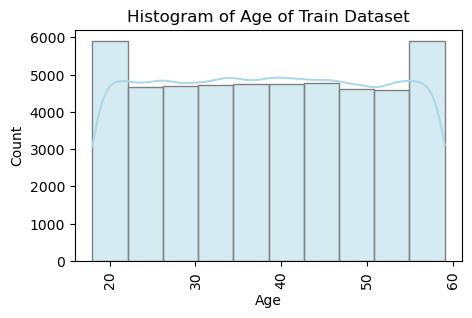

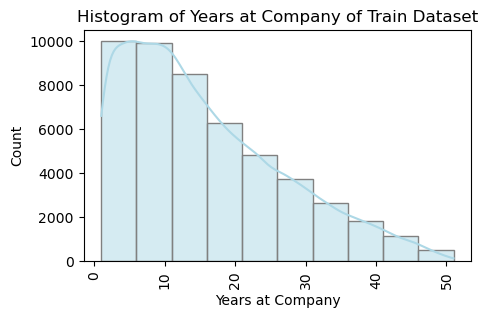

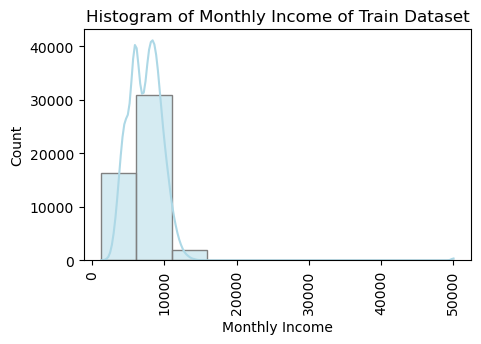

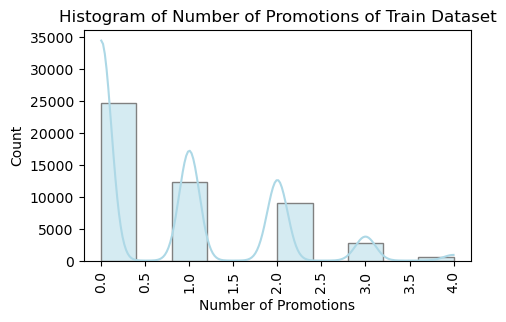

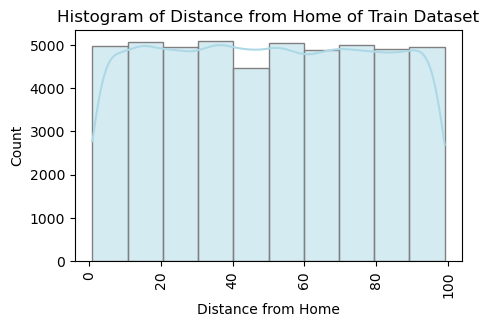

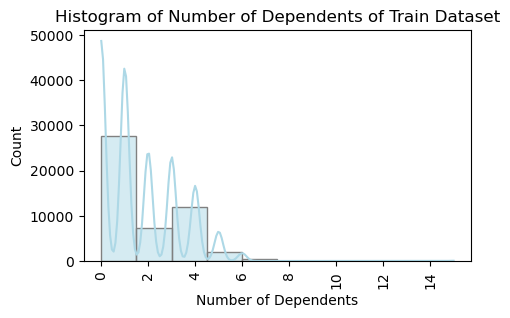

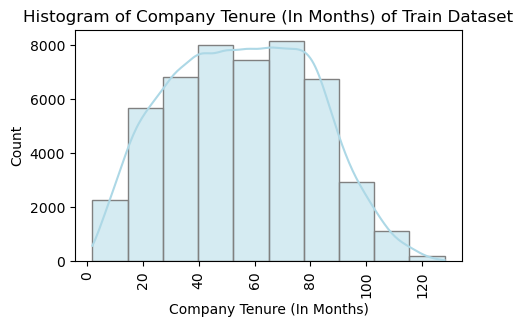

In [69]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot all the numerical columns to understand their distribution
for col in num_cols:
        plt.figure(figsize=(5, 3))
        plt.title(f"Histogram of {col} of Train Dataset")
        plt.xticks(rotation=90)
        sns.histplot(x=X_train[col], bins=10, color='lightblue', edgecolor='gray',kde=True)
        plt.show()

#### Insights derived from the Histplot Visualization of Train Dataset:
- Age: Age seems evenly distributed across the train dataset with no obvious  skew or concentration in any specific age group. 
- Years at Company: Majority of the employees appear to have <10 years at the company with fewer people staying long-term.
- Monthly Income: Most of the employees seem to earn under 10,000/month with a small number earning significantly more.
- Number of Promotions: Most of the employees received 0–2 promotions and very few with 3 or more promotions. 
- Distance from Home: Employees appear to live at various distances from work with no dominant cluster or noticeable pattern.
- Number of Dependents: Most of the employees have 0–2 dependents, but few have many dependents (more than 4). 
- Company Tenure (In Months): Most employees have a moderate tenure (around 40–80 months), with fewer being either very new or highly tenured.

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

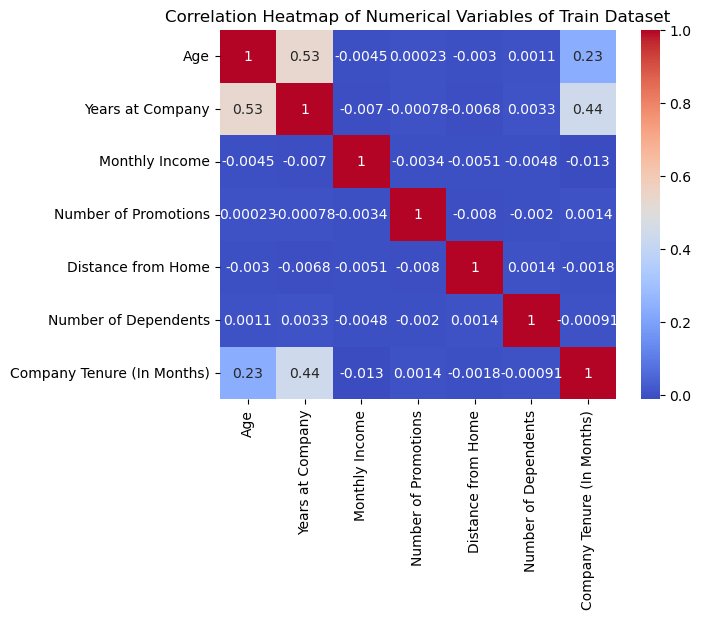

In [70]:
# Create correlation matrix for numerical columns
num_corr=X_train[num_cols].corr()
# Plot Heatmap of the correlation matrix
sns.heatmap(num_corr,cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap of Numerical Variables of Train Dataset')
plt.show()

#### Insights from Heatmap of the numerical variables of Train Dataset:
- No signs of extreme multicollinearity (i.e., no correlations exceeding 0.8) are observed in the heatmap.
- Strongest Correlations:
    - Age & Years at Company - Correlation: 0.53.
      As expected, older employees tend to have spent more years at the company.
    - Years at Company & Company Tenure (in Months) - Correlation: 0.44.
      These are closely related measures of experience, though not perfectly correlated.
    - Age & Company Tenure (in Months) - Correlation: 0.23.
      As expected again, older employees tend to have been in the industry longer, even if not always with the same employer.

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

In [73]:
# Checking the distribution of target variable in training set to check class balance
class_distribution_train =100*y_train.value_counts(normalize=True)
print(class_distribution_train)

Attrition
Stayed    51.834379
Left      48.165621
Name: proportion, dtype: float64


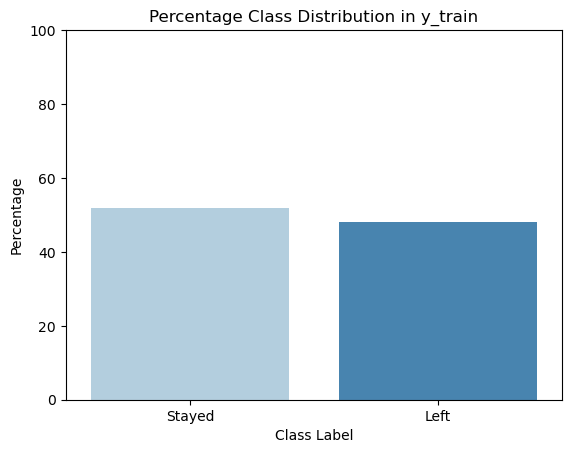

In [75]:
# Plot a bar chart to check class balance
sns.barplot(x=class_distribution_train.index, y=class_distribution_train.values,palette="Blues")
plt.title('Percentage Class Distribution in y_train')
plt.ylabel('Percentage')
plt.xlabel('Class Label')
plt.ylim(0, 100) 
plt.show()

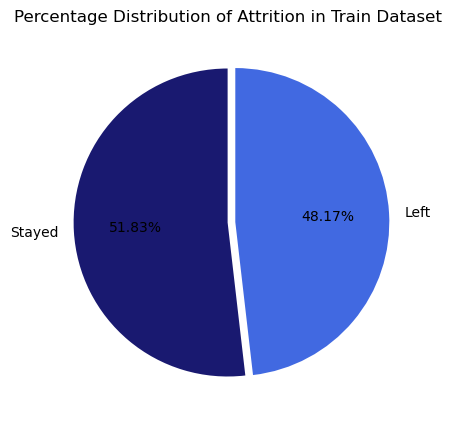

In [77]:
# Plotting the percentage distribution of the target variable Attrition in the training dataset as a pie chart
plt.figure(figsize=(15,5))
plt.title("Percentage Distribution of Attrition in Train Dataset")
y_train.value_counts().plot.pie(autopct='%1.2f%%', colors=['midnightblue', 'royalblue'], startangle=90,labels=['Stayed', 'Left'],explode= [0.0,0.05])
plt.ylabel("")
plt.show()

#### Insights from Class Balance Visualizations of Train Dataset:

Both the bar plot and pie chart show that the class distribution is nearly balanced.

In the training dataset, the class distribution is relatively balanced, with 51.83% of employees staying and 48.17% leaving. 

This balance is beneficial for modeling, as it reduces the risk of bias towards the majority class and allows for the use of standard evaluation metrics without resampling techniques.

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

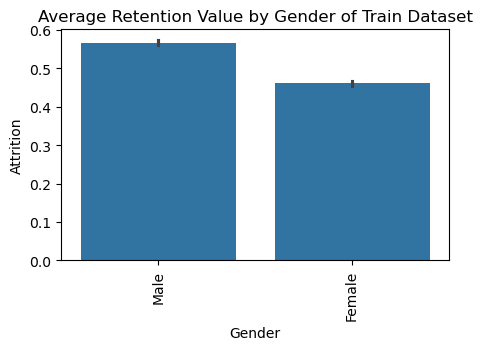

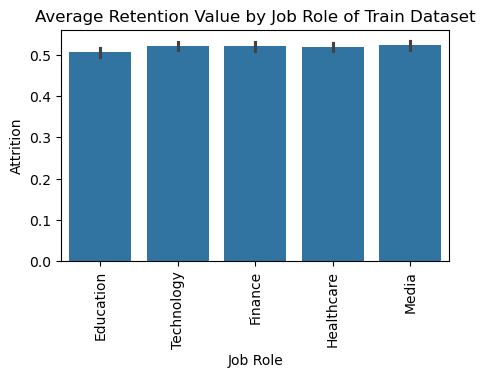

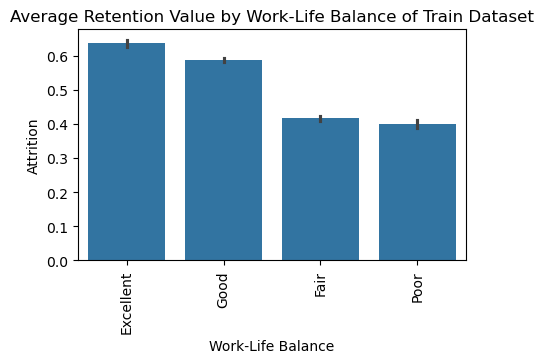

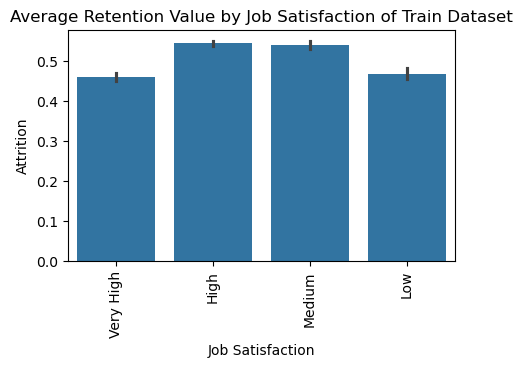

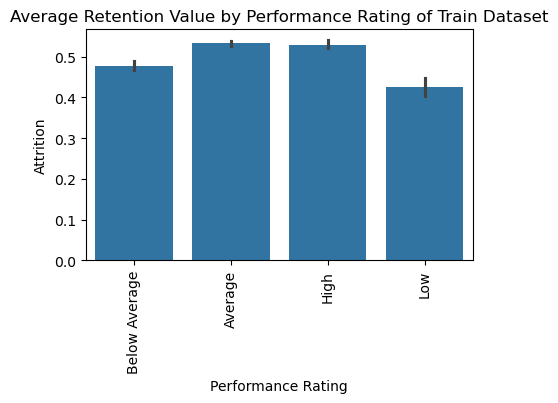

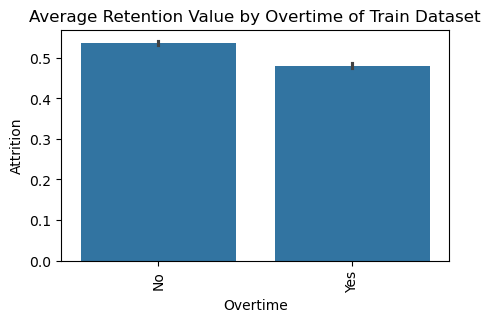

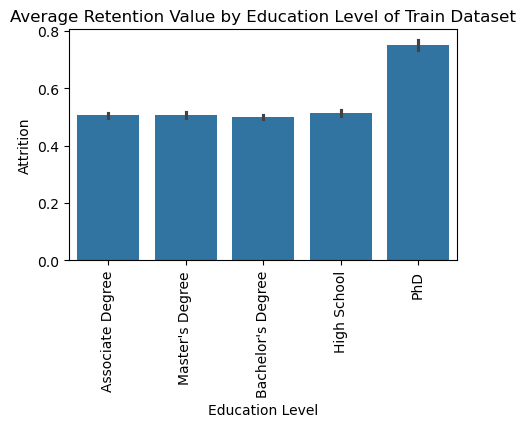

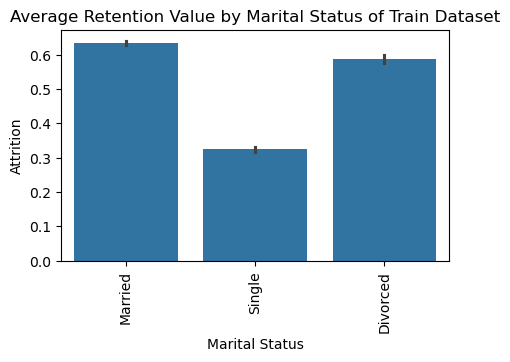

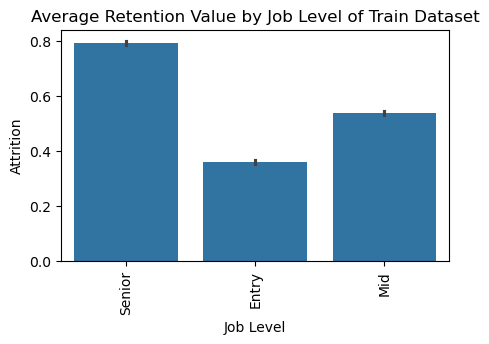

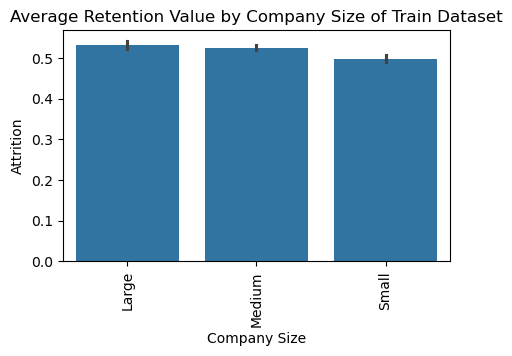

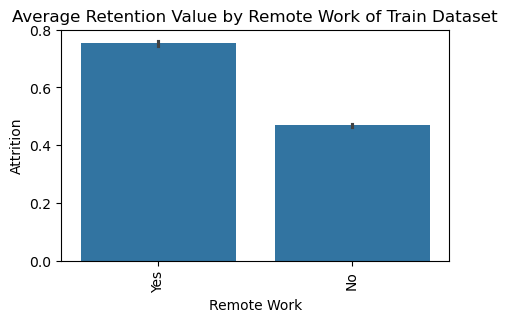

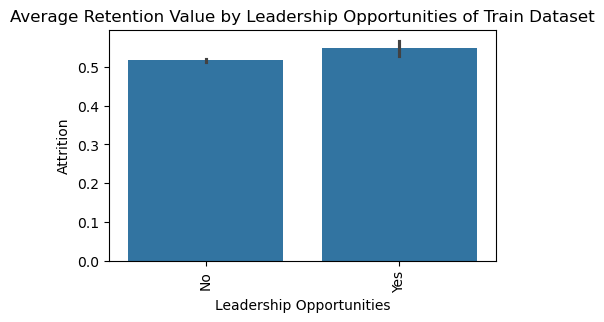

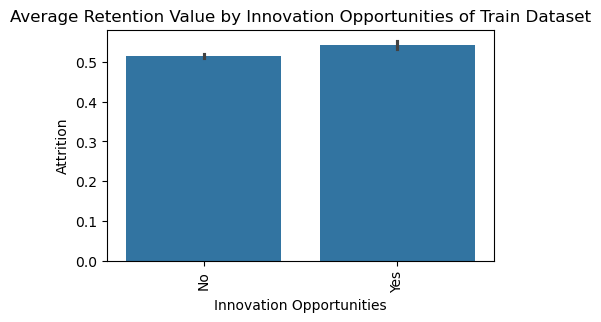

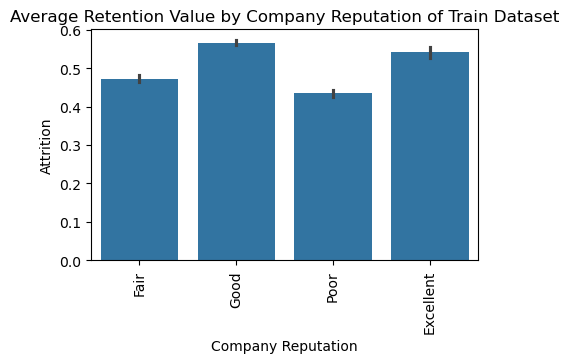

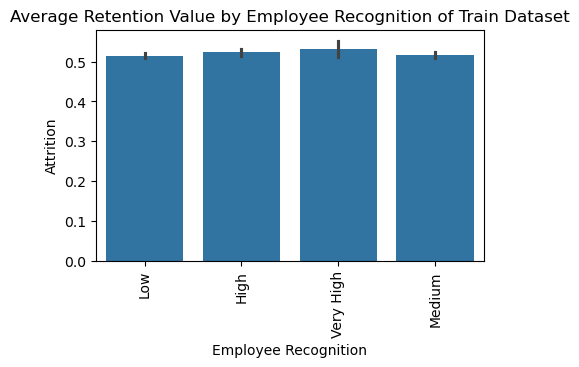

In [79]:
# Plot distribution for each categorical column with target variable
cat_cols=['Gender', 'Job Role', 'Work-Life Balance',
 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level',
 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']

for col in cat_cols:
        plt.figure(figsize=(5, 3))
        plt.title(f"Average Retention Value by {col} of Train Dataset")
        plt.xticks(rotation=90)
        sns.barplot(x=X_train[col], y=y_train.map({'Stayed': 1, 'Left': 0}))
        plt.show()

#### Insights from the Bivariate Analysis on Training Dataset between all the Categorical columns and Target variable:
- Gender: Men seem to have a higher average retention rate.
- Job Role: The average retention rate is almost the same across different job roles.
- Work-Life Balance: The "Excellent" category has the highest retention rate, followed by the "Good" category.
- Job Satisfaction: Both the "High" and "Medium" job satisfaction categories show higher average retention rates.
- Performance Rating: Employees with "High" and "Average" performance ratings have the highest average retention rates.
- Overtime: Employees working without overtime have a slightly higher average retention rate.
- Education Level: The "PhD" category has the highest  average retention rate, with other education levels showing almost similar rates.
- Marital Status: "Married" employees have the highest average retention rate, followed by "Divorced", and then "Single".
- Job Level: "Senior" employees have the highest average retention rate, followed by "Mid", and then "Entry" having the lowest rate.
- Company Size: "Large" and "Medium" companies have higher average retention rates as compared to small companies.
- Remote Work: Employees with remote work options have a significantly higher average retention rate.
- Leadership Opportunities: Employees with leadership opportunities have a slightly higher average retention rate.
- Innovation Opportunities: Employees with innovation opportunities have a slightly higher average retention rate.
- Company Reputation: The "Good" reputation category has the highest average retention rate, followed by "Excellent", "Fair", and then "Good".
- Employee Recognition: The average retention rate is nearly the same across all categories.

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [81]:
# Select numerical columns
num_cols=['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 
          'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']

5.1.2 Plot distribution of numerical columns

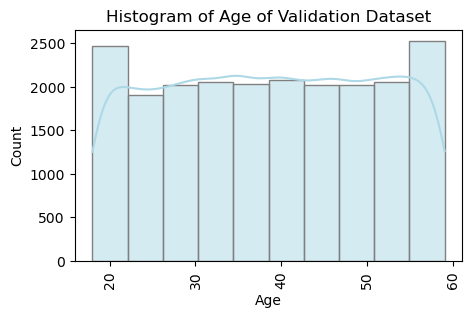

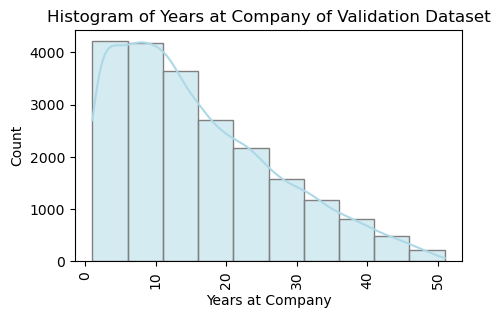

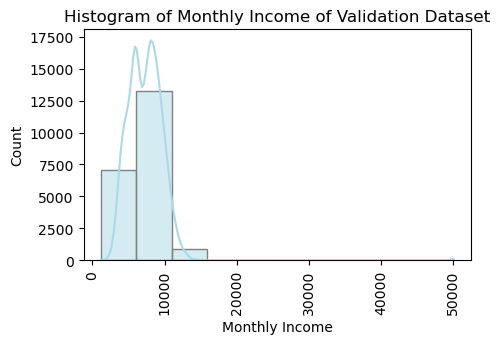

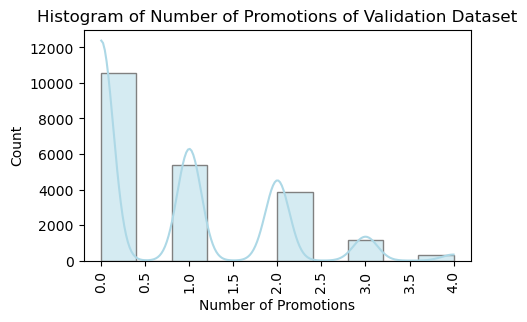

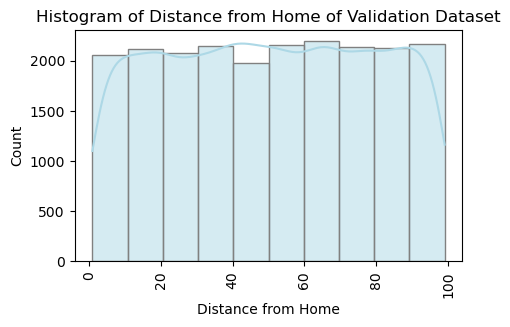

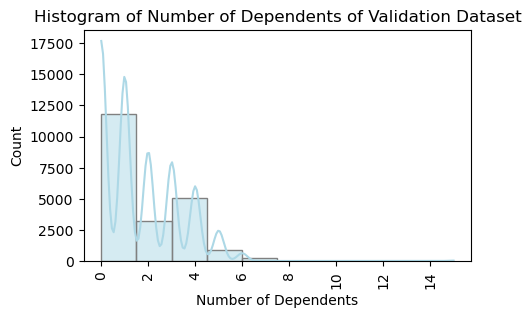

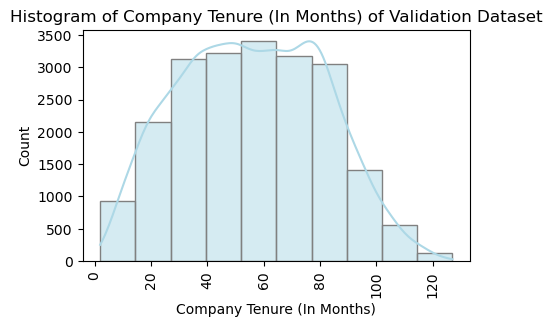

In [84]:
# Plot all the numerical columns to understand their distribution
for col in num_cols:
        plt.figure(figsize=(5, 3))
        plt.title(f"Histogram of {col} of Validation Dataset")
        plt.xticks(rotation=90)
        sns.histplot(x=X_validation[col], bins=10, color='lightblue', edgecolor='gray',kde=True)
        plt.show()

The insights derived from the Histplot Visualization of the Validation Dataset align closely with the findings from the Train Dataset, indicating similar distributions across both datasets.

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

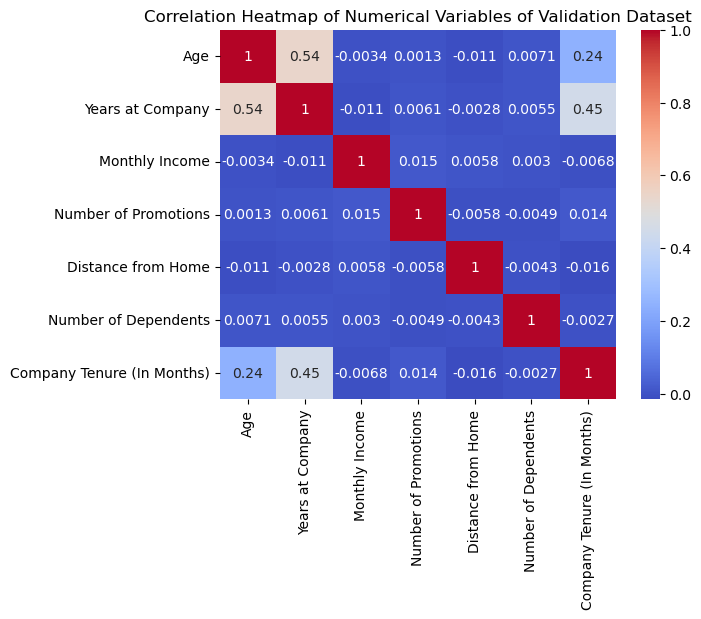

In [86]:
# Create correlation matrix for numerical columns
num_corr=X_validation[num_cols].corr()
# Plot Heatmap of the correlation matrix
sns.heatmap(num_corr,cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap of Numerical Variables of Validation Dataset')
plt.show()

The insights from the Heatmap of the Validation Dataset are similar to those of the Train Dataset. There are no signs of extreme multicollinearity, with no correlations exceeding 0.8. 

The strongest correlations are between Age and Years at Company (0.54), Years at Company and Company Tenure (in Months) (0.45), and Age and Company Tenure (in Months) (0.24). 

These correlations are in line with expectations, which is that that older employees tend to have more years at the company and longer tenures in the industry, though not perfectly correlated.

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [88]:
# Checking the distribution of target variable in training set to check class balance
class_distribution_validation =100*y_validation.value_counts(normalize=True)
print(class_distribution_validation)

Attrition
Stayed    52.76833
Left      47.23167
Name: proportion, dtype: float64


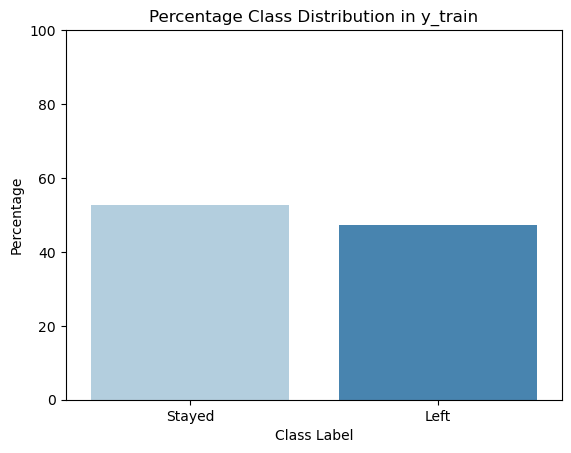

In [90]:
# Plot a bar chart to check class balance
sns.barplot(x=class_distribution_validation.index, y=class_distribution_validation.values,palette="Blues")
plt.title('Percentage Class Distribution in y_train')
plt.ylabel('Percentage')
plt.xlabel('Class Label')
plt.ylim(0, 100) 
plt.show()

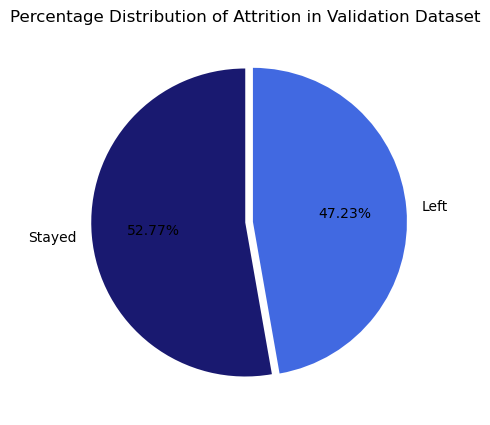

In [93]:
# Plotting the percentage distribution of the target variable Attrition in the validation dataset as a pie chart
plt.figure(figsize=(15,5))
plt.title("Percentage Distribution of Attrition in Validation Dataset")
y_validation.value_counts().plot.pie(autopct='%1.2f%%', colors=['midnightblue', 'royalblue'], startangle=90,labels=['Stayed', 'Left'],explode= [0.0,0.05])
plt.ylabel("")
plt.show()

Both the bar plot and pie chart show that the class distribution is nearly balanced.

The class distribution of the Attrition variable is nearly balanced in both the Train and Validation Datasets. 

In the Train Dataset, approximately 51.83% of the records belong to Stayed and 48.17% to Left. Similarly, in the Validation Dataset, about 52.77% belong to Stayed and 47.23% to Left. 

This indicates a well-balanced target variable across both datasets.

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

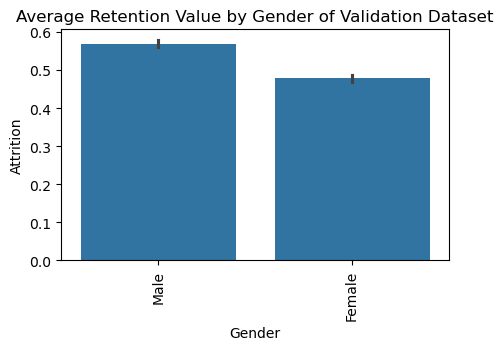

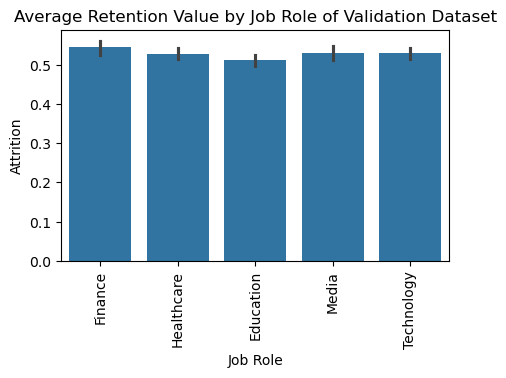

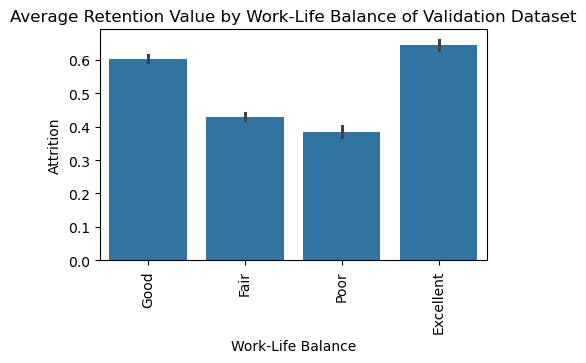

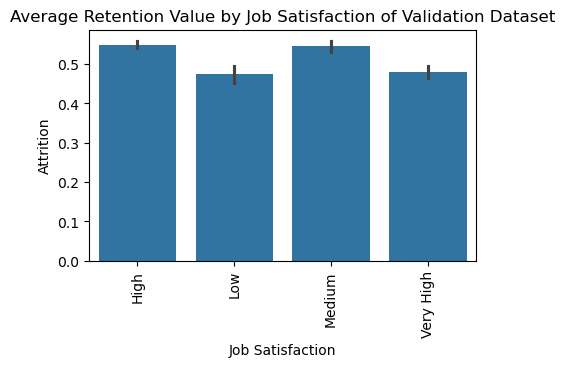

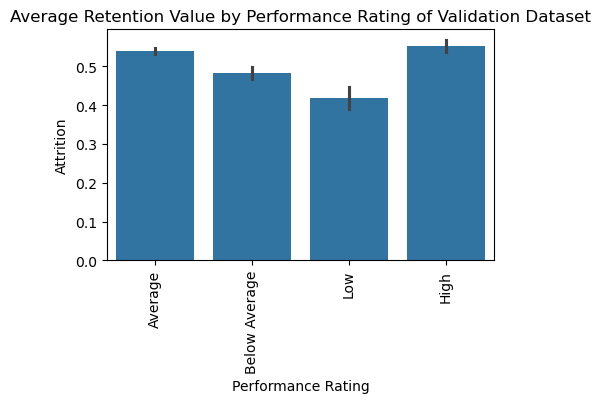

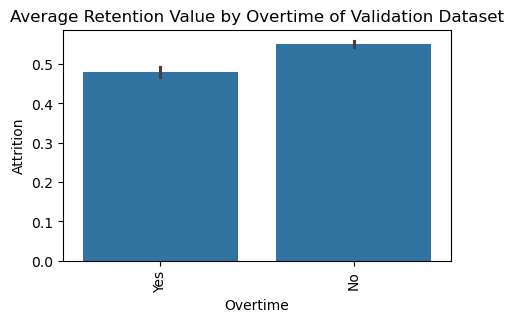

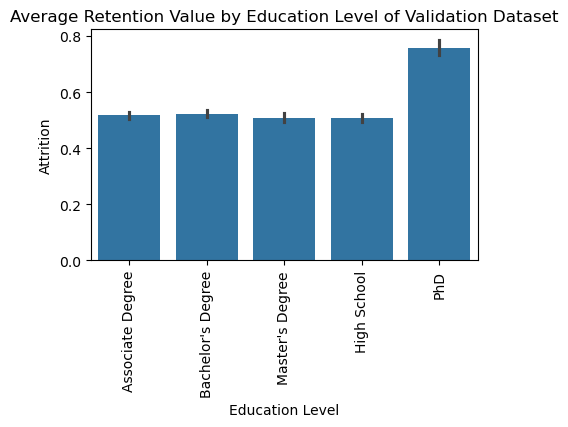

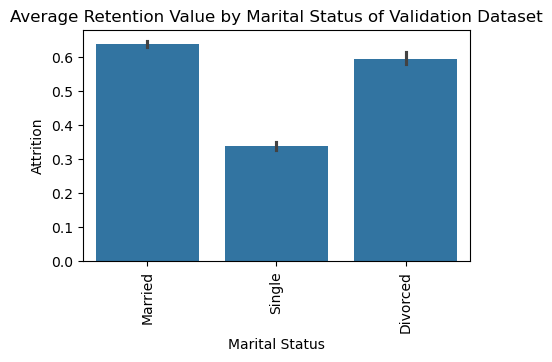

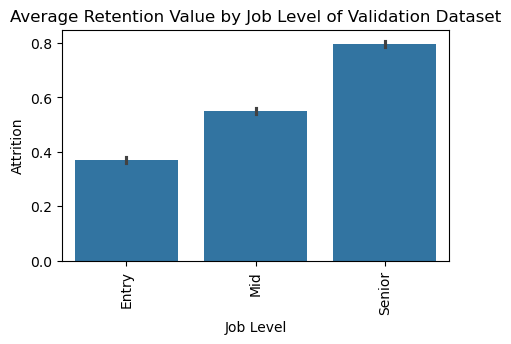

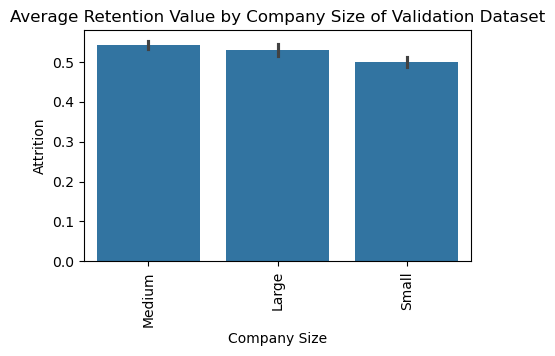

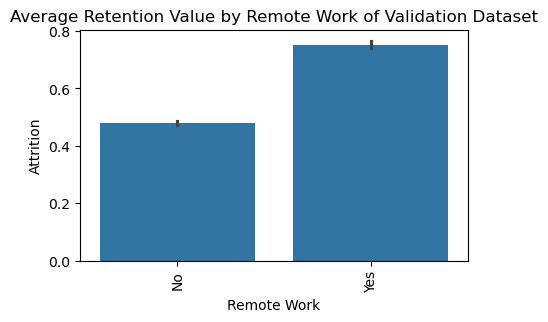

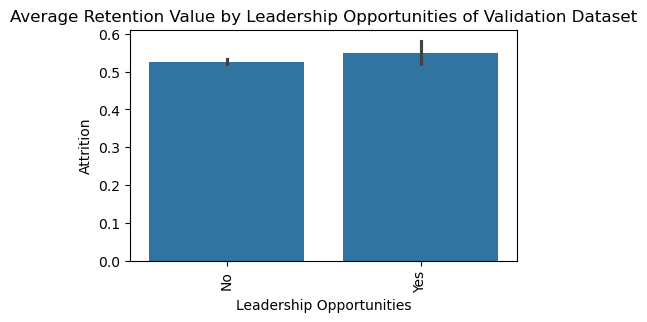

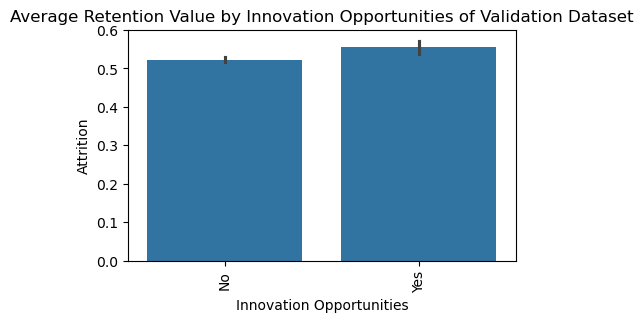

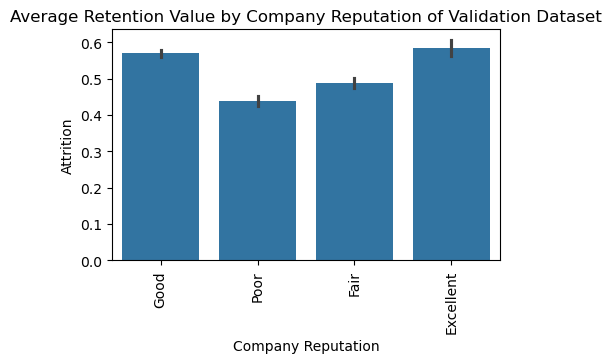

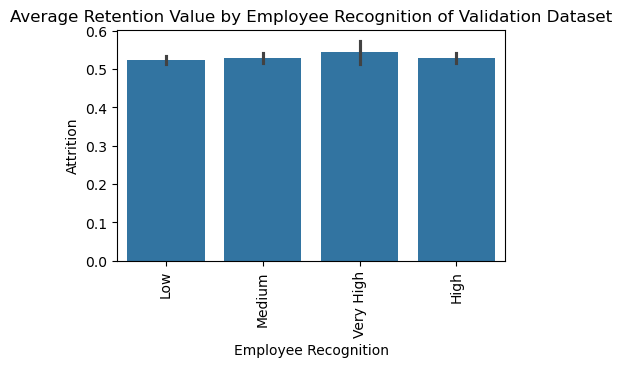

In [97]:
# Plot distribution for each categorical column with target variable
cat_cols=['Gender', 'Job Role', 'Work-Life Balance',
 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level',
 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']

for col in cat_cols:
        plt.figure(figsize=(5, 3))
        plt.title(f"Average Retention Value by {col} of Validation Dataset")
        plt.xticks(rotation=90)
        sns.barplot(x=X_validation[col], y=y_validation.map({'Stayed': 1, 'Left': 0}))
        plt.show()

The patterns observed in the Validation Dataset closely align with those in the Train Dataset, which indicates similar distributions across both datasets.

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [107]:
# Check the categorical columns
cat_cols = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
    'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level',
    'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
    'Company Reputation', 'Employee Recognition']
len(cat_cols)

15

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [109]:
# Create dummy variables using the 'get_dummies' for independent columns
dummies=pd.get_dummies(X_train[cat_cols], drop_first = True).astype(int)
print(dummies.shape)
# Add the results to the master DataFrame
X_train=pd.concat([X_train,dummies],axis=1)
# Checking the shape of the dataframe after adding dummy variables  
print(X_train.shape)

(49390, 34)
(49390, 56)


Now, drop the original categorical columns and check the DataFrame

In [111]:
# Drop the original categorical columns and check the DataFrame
X_train.drop(cat_cols, axis=1, inplace=True) 
# Checking the final shape of the dataframe after dropping the original categorical columns  
print(X_train.shape)

(49390, 41)


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [113]:
# Create dummy variables using the 'get_dummies' for independent columns
dummies=pd.get_dummies(X_validation[cat_cols], drop_first = True).astype(int)
print(dummies.shape)
# Add the results to the master DataFrame
X_validation=pd.concat([X_validation,dummies],axis=1)
# Checking the shape of the dataframe after adding dummy variables  
print(X_validation.shape)


(21168, 34)
(21168, 56)


Now, drop the original categorical columns and check the DataFrame

In [115]:
# Drop categorical columns and check the DataFrame
X_validation.drop(cat_cols, axis=1, inplace=True) 
# Checking the final shape of the dataframe after dropping the original categorical columns  
print(X_validation.shape)

(21168, 41)


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [117]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train=pd.DataFrame(y_train)
y_validation=pd.DataFrame(y_validation)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [119]:
# Create dummy variables using the 'get_dummies' for dependent column
dummies_train=pd.get_dummies(y_train).astype(int)
print(dummies_train.shape)

(49390, 2)


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [121]:
# Create dummy variables using the 'get_dummies' for dependent column
dummies_validation=pd.get_dummies(y_validation).astype(int)
print(dummies_validation.shape)

(21168, 2)


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [123]:
# Drop redundant columns from both train and validation
y_train=dummies_train.pop('Attrition_Stayed')
y_validation=dummies_validation.pop('Attrition_Stayed')

Since the objective is to develop a logistic regression model to predict employee retention based on demographic details, job satisfaction scores, performance metrics, and tenure, we are keeping 'Attrition_Stayed' as the target variable.

#### Detecting and Handling Outliers
To ensure more accurate detection of outliers, we are applying a log transformation to the Monthly Income variable before analyzing it for extreme values. This is because the original distribution was highly right-skewed as visualized in the Histplot Visualization above and this will stabilize the variance thereby improving the model's performance.

In [99]:
# Applying log transformation to reduce skewness in Monthly Income column for both training and validation datasets
X_train['Monthly Income'] = np.log1p(X_train['Monthly Income'])
X_validation['Monthly Income'] = np.log1p(X_validation['Monthly Income'])

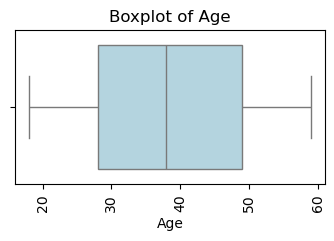

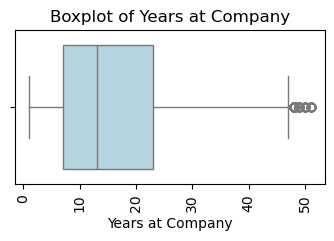

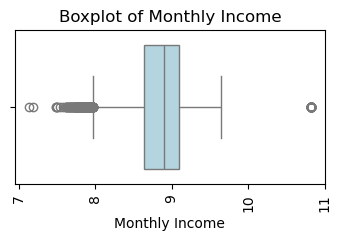

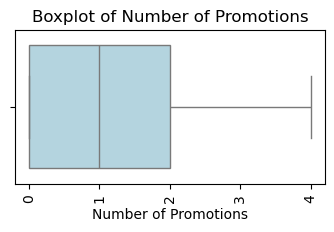

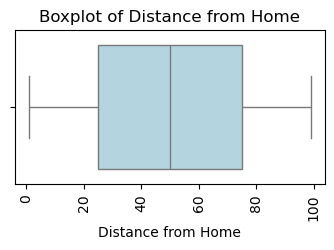

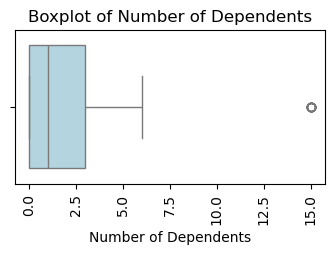

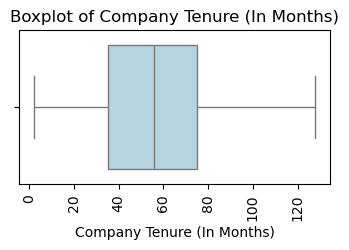

In [101]:
# Visualizing the outliers in numerical columns of train dataset using boxplots to identify any extreme values or anomalies
for col in num_cols:
    plt.figure(figsize=(4,2))
    plt.title(f"Boxplot of {col}")
    plt.xticks(rotation=90)
    sns.boxplot(x=X_train[col],color='lightblue')
    plt.show()

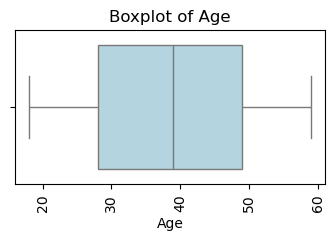

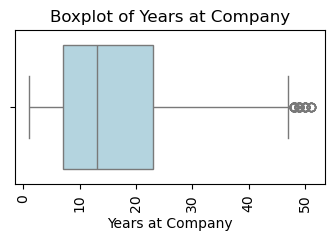

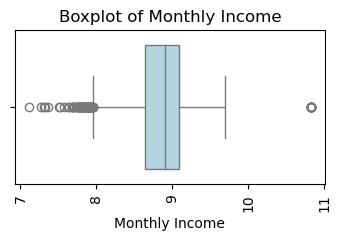

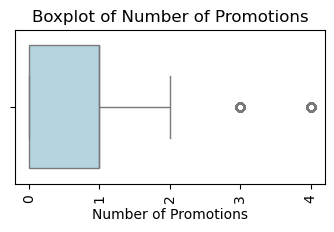

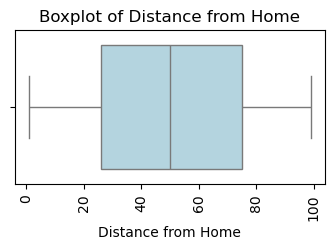

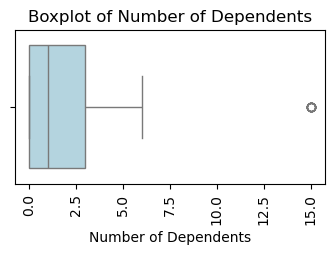

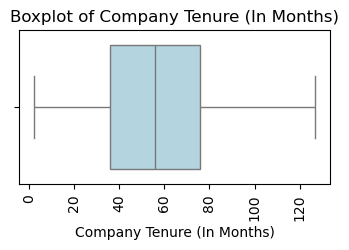

In [103]:
# Visualizing the outliers in numerical columns of validation dataset using boxplots to identify any extreme values or anomalies
for col in num_cols:
    plt.figure(figsize=(4,2))
    plt.title(f"Boxplot of {col}")
    plt.xticks(rotation=90)
    sns.boxplot(x=X_validation[col],color='lightblue')
    plt.show()

We are capping the numerical features 'Years at Company', 'Monthly Income', and 'Number of Dependents' at the 95th percentile to reduce the influence of extreme values that could possibly distort the model’s learning. 

These variables showed significant right-skewness with a few unusually high values when visualized above, which could affect model performance more than it should. 

By capping these feature values at the 95th percentile, we are trying to preserve their general distribution while minimizing the effect of outliers, so that we can have better model stability and more reliable predictions.

In [105]:
# List of columns to cap
cols_to_cap=['Years at Company', 'Monthly Income', 'Number of Dependents']
#Iterating through the columns to cap outliers at the 95th percentile in the train set
for col in cols_to_cap:
    up_cap=X_train[col].quantile(0.95)
    X_train[col]=np.where(X_train[col]>up_cap,up_cap,X_train[col])

#Iterating through the columns to cap outliers at the 95th percentile in the validation set
for col in cols_to_cap:
    up_cap=X_validation[col].quantile(0.95)
    X_validation[col]=np.where(X_validation[col]>up_cap,up_cap,X_validation[col])

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [125]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

We are using StandardScaler in this case because logistic regression performs better when the input features are standardized to have a mean of zero and a standard deviation of one. StandardScaler is also more appropriate for algorithms like logistic regression that assume linear relationships and are sensitive to the distribution of input features.

This scaling ensures that all numeric features are are on a comparable scale and contribute equally to the model and prevents features with larger ranges from dominating the learning process or disproportionately influencing the model. StandardScaler is also less affected by outliers.

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [127]:
print(num_cols)

['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']


In [129]:
# Scale the numeric features present in the training set
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
# Scale the numerical features present in the validation set
X_validation[num_cols]=scaler.transform(X_validation[num_cols])

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [131]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [133]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE

rfe=RFE(estimator=logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [134]:
# Display the features selected by RFE
X_train.columns[rfe.support_]

Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [137]:
# Put columns selected by RFE into variable 'col'
col=X_train.columns[rfe.support_]

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [139]:
# Select only the columns selected by RFE
X_train_rfe = X_train[col]

In [141]:
# View the training data
X_train_rfe.head()

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
47704            1                       0                       0   
59804            1                       0                       0   
40275            1                       0                       0   
34096            0                       1                       0   
2598             0                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
47704                     0                           1   
59804                     0                           0   
40275                     0                           0   
34096                     0                           0   
2598                      0                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
47704                                 1                       0             0   
59804                                 0                       0             0   
40275                                 0                       0             1   
34096                                 0                       0             1   
2598                                  0                       0             1   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
47704                    0                      0              0   
59804                    0                      1              0   
40275                    0                      0              0   
34096                    0                      1              0   
2598                     0                      0              0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
47704                 1                1                        1   
59804                 0                0                        0   
40275                 0                1                        1   
34096                 0                0                        0   
2598                  0                0                        0   

       Company Reputation_Poor  
47704                        0  
59804                        0  
40275                        0  
34096                        0  
2598                         0

In [143]:
X_train_rfe.shape

(49390, 15)

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [145]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_rfe_sm=sm.add_constant(X_train_rfe)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [147]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logmodel1=sm.GLM(y_train,X_train_rfe_sm,family=sm.families.Binomial())
logmodel1result=logmodel1.fit()
logmodel1result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       Attrition_Stayed   No. Observations:                49390
Model:                            GLM   Df Residuals:                    49374
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24977.
Date:                Sun, 20 Apr 2025   Deviance:                       49955.
Time:                        13:24:49   Pearson chi2:                 4.63e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3117
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2091      0.028      7.395      0.000       0.154       0.265
Gender_Male                          0.6017      0.022     27.058      0.000       0.558       0.645
Work-Life Balance_Fair              -1.0682      0.025    -42.299      0.000      -1.118      -1.019
Work-Life Balance_Poor              -1.2056      0.034    -35.888      0.000      -1.271      -1.140
Job Satisfaction_Low                -0.4815      0.037    -12.940      0.000      -0.554      -0.409
Job Satisfaction_Very High          -0.4958      0.028    -17.847      0.000      -0.550      -0.441
Performance Rating_Below Average    -0.3338      0.031    -10.797      0.000      -0.394      -0.273
Performance Rating_Low              -0.5613      0.052    -10.898      0.000      -0.662      -0.460
Overtime_Yes                        -0.3196      0.023    -13.624      0.000      -0.366      -0.274
Education Level_PhD                  1.5295      0.056     27.515      0.000       1.421       1.638
Marital Status_Single               -1.7056      0.025    -69.171      0.000      -1.754      -1.657
Job Level_Mid                        0.9711      0.024     40.031      0.000       0.924       1.019
Job Level_Senior                     2.5260      0.035     73.146      0.000       2.458       2.594
Remote Work_Yes                      1.7194      0.032     53.314      0.000       1.656       1.783
Company Reputation_Fair             -0.5162      0.029    -18.073      0.000      -0.572      -0.460
Company Reputation_Poor             -0.7483      0.029    -26.215      0.000      -0.804      -0.692
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



The positive coefficients which indicate that an increase in the value of feature would increase the odds of the event occurring include the following:

- Job Level_Senior with a coefficient of 2.5260	indicates that Senior-level employees have a very high tendency to stay.
- Remote Work_Yes	with a coefficient	of 1.7194 indicates that Remote work has a strong positive effect on retention.
- Education Level_PhD with a coefficient of 1.5295 indicates that PhD holders are much more likely to stay.
- Job Level_Mid	with a coefficient of 0.9711 indicates that Mid-level employees are also more likely to stay.
- Gender_Male	with a coefficient	of 0.6017 indicates that Males have higher odds of staying than females.

The negative coefficients which indicate that an increase in the value of feature would decrease the odds of the event occurring include the following:

- Marital Status_Single	with a coefficient of -1.7056 indicates that Single employees are much more likely to leave.
- Work-Life Balance_Poor with a coefficient of -1.2056 indicates that Poor work-life balance has a strong negative effect.
- Work-Life Balance_Fair with a coefficient of -1.0682 indicates that Fair work-life balance is also bad for retention.
- Company Reputation_Poor with a coefficient of -0.7483 indicates that Poor company reputation worsens retention.
- Company Reputation_Fair with a coefficient of -0.5162 indicates that Fair company reputation decreases retention.
- Job Satisfaction_Very High with a coefficient of -0.4958 indicates that even very high satisfaction reduces retention which might indicate burnout or overqualification.
- Job Satisfaction_Low with a coefficient of -0.4815 indicates that Low satisfaction reduces retention.
- Performance Rating_Low with a coefficient of -0.5613 indicates that Very poor performers are more likely to leave.
- Performance Rating_Below Average with a coefficient of -0.3338 indicates that Poor performers tend to leave.
- Overtime_Yes with a coefficient of -0.3196 indicates that Overtime has a negative effect on retention which may reflect burnout.

From this we can see that factors such as senior job levels, remote work opportunities, higher education, mid-level positions, and being male are associated with greater employee retention, while poor or fair work-life balance, poor company reputation, low or very high job satisfaction, low performance ratings, and frequent overtime and being single are associated to a higher likelihood of employee attrition.

7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [149]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
# Defining a function to check the VIF for the features in the given dataset  

def check_vif(X_train):
    # Creating an empty DataFrame to store VIF values  
    vif=pd.DataFrame()
    # Assigning column names  
    vif['Independent variables x']=X_train.columns
    # Computing VIF for each independent variable  
    vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    # Rounding VIF values to 2 decimal places for better readability  
    vif['VIF']=round(vif['VIF'],2)
    # Sorting variables in descending order of VIF to identify highly collinear variables  
    vif=vif.sort_values(by='VIF',ascending =False)
    # Displaying the VIF values  
    return vif

In [153]:
# Make a VIF DataFrame for all the variables present
check_vif(X_train_rfe_sm)

Independent variables x   VIF
0                              const  7.15
11                     Job Level_Mid  1.20
12                  Job Level_Senior  1.20
2             Work-Life Balance_Fair  1.08
3             Work-Life Balance_Poor  1.08
14           Company Reputation_Fair  1.07
15           Company Reputation_Poor  1.07
4               Job Satisfaction_Low  1.03
5         Job Satisfaction_Very High  1.03
6   Performance Rating_Below Average  1.01
7             Performance Rating_Low  1.01
1                        Gender_Male  1.00
8                       Overtime_Yes  1.00
9                Education Level_PhD  1.00
10             Marital Status_Single  1.00
13                   Remote Work_Yes  1.00

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

Since all the p-values are statistically significant (p < 0.05) and the Variance Inflation Factor values are well within acceptable limits (all VIFs < 5), this indicats no multicollinearity concerns and we are proceeding with the model (logmodel1) without removing any of the 15 features.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [155]:
# Predict the probabilities on the training set
y_train_pred=logmodel1result.predict(X_train_rfe_sm)

In [157]:
# Inspecting the first few rows of the dataset
y_train_pred.head()

47704    0.976117
59804    0.290127
40275    0.844811
34096    0.052935
2598     0.472410
dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [159]:
# Reshape it into an array
y_train_pred=y_train_pred.values.reshape(-1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [161]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_final=pd.DataFrame({"Actual Stayed":y_train,"Predicted Probability of Staying":y_train_pred})

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [163]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['Predicted']=y_train_pred_final["Predicted Probability of Staying"].map(lambda x: 1 if x>0.5 else 0)

In [165]:
y_train_pred_final.head()

Actual Stayed  Predicted Probability of Staying  Predicted
47704              1                          0.976117          1
59804              0                          0.290127          0
40275              1                          0.844811          1
34096              0                          0.052935          0
2598               1                          0.472410          0

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [167]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final['Actual Stayed'],y_train_pred_final['Predicted']))

0.7389350070864548


Accuracy is the proportion of correct predictions made by the model out of the total predictions made. 

The accuracy score of 73.89% on the Train Dataset indicates that the model correctly predicted the Employee Retention Class ("Stayed" or "Left") in  approximately 74% of the cases which suggests that the model is performing reasonably well in distinguishing between employees who stay and those who leave, based on the features we provided.

7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [169]:
# Create confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final['Actual Stayed'],y_train_pred_final['Predicted'])
print(confusion)

[[17289  6500]
 [ 6394 19207]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [171]:
# Create variables for true positive, true negative, false positive and false negative
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [173]:
# Calculate sensitivity
sensitivity=TP/(TP+FN)
print(sensitivity)

0.7502441310886293


Sensitivity, also known as the True Positive Rate, is the proportion of correctly predicted positive cases out of the total actual positive cases. 

The sensitivity of 75.02% indicates that the model correctly identified approximately 75% of the actual positive cases (i.e. employees who stayed), but it missed 25% of the employees who stayed (i.e. false negatives).

In [175]:
# Calculate specificity
specificity=TN/(TN+FP)
print(specificity)

0.7267644709739796


Specificity, also known as the True Negative Rate, is the proportion of correctly predicted negative cases out of the total actual negative cases. 

The specificity of 72.67% indicates that the model correctly identified approximately 73% of the actual negative cases (i.e. employees who left the company), but 27% of the employees who left were incorrectly predicted as staying (i.e. false positives).

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [178]:
# Calculate precision
precision=TP/(TP+FP)
print(precision)

0.7471505815536624


Precision, also known as the Positive Predictive Value, is the proportion of correctly predicted positive cases out of the total predicted positive cases.

The precision of 74.71% indicates that the model correctly identified approximately 75% of the actual positive cases (i.e. employees who stayed), but it incorrectly identified 25% of the employees who actually left as staying (i.e. false positives).

In [180]:
# Calculate recall
recall=TP/(TP+FN)
print(recall)

0.7502441310886293


Recall is the same as sensitivity and is the proportion of correctly predicted positive cases out of the total actual positive cases.

The recall of 75.02% indicates that the model correctly identified approximately 75% of the actual positive cases (i.e. employees who stayed), but it missed 25% of the employees who stayed (i.e. false negatives).

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [182]:
# Define ROC function
def draw_ROC_curve(actual,prob):
    FPR,TPR,thresholds=metrics.roc_curve(actual,prob,drop_intermediate=False)
    AUC_score=metrics.roc_auc_score(actual,prob)
    plt.figure(figsize=(5,5))
    plt.plot(FPR,TPR,label='ROC Curve (area=%0.2f)'%AUC_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or (1-True Negative Rate (or Specificity))')
    plt.ylabel('True Positive Rate (or Sensitivity)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


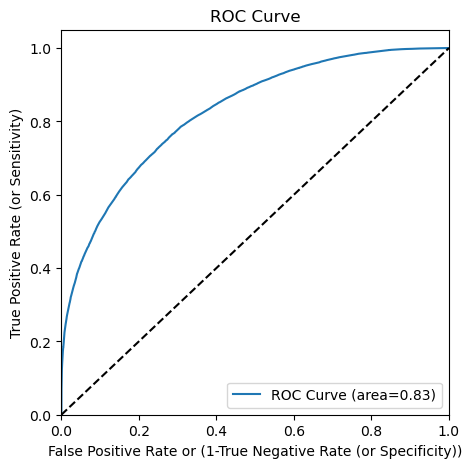

In [184]:
# Call the ROC function

draw_ROC_curve(y_train_pred_final['Actual Stayed'],y_train_pred_final['Predicted Probability of Staying'])

The ROC Area Under the Curve is 0.83, which indicates good model performance. 

This means the model is performing well at distinguishing between the two classes i.e. whether an employee stayed or left.

Since the AUC is 0.83, the model has a high probability (approximately 83%) of ranking a randomly chosen positive instance (e.g. an employee who stayed) higher than a negative one (e.g. an employee who left).

The True Positive Rate (i.e. Sensitivity) is significantly higher than the False Positive Rate at most thresholds, which further indicates the model’s reliability in correctly identifying positive cases.

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [186]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
num=[float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]=y_train_pred_final['Predicted Probability of Staying'].map(lambda x: 1 if x>i else 0)

y_train_pred_final.head()

Actual Stayed  Predicted Probability of Staying  Predicted  0.0  0.1  \
47704              1                          0.976117          1    1    1   
59804              0                          0.290127          0    1    1   
40275              1                          0.844811          1    1    1   
34096              0                          0.052935          0    1    0   
2598               1                          0.472410          0    1    1   

       0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
47704    1    1    1    1    1    1    1    1  
59804    1    0    0    0    0    0    0    0  
40275    1    1    1    1    1    1    1    0  
34096    0    0    0    0    0    0    0    0  
2598     1    1    1    0    0    0    0    0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [188]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df=pd.DataFrame(columns=['Probability','Accuracy', 'Sensitivity', 'Specificity'])

num = [float(x)/10 for x in range(10)]
for i in num:
    CM = metrics.confusion_matrix(y_train_pred_final['Actual Stayed'], y_train_pred_final[i] )
    total=sum(sum(CM))
    Accuracy = (CM[0,0]+CM[1,1])/total
    Specificity = CM[0,0]/(CM[0,0]+CM[0,1])
    Sensitivity = CM[1,1]/(CM[1,0]+CM[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy, Sensitivity, Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.518344     1.000000     0.000000
0.1          0.1  0.588277     0.994922     0.150658
0.2          0.2  0.659263     0.961095     0.334440
0.3          0.3  0.707026     0.901723     0.497499
0.4          0.4  0.729824     0.838444     0.612930
0.5          0.5  0.738935     0.750244     0.726764
0.6          0.6  0.731059     0.643022     0.825802
0.7          0.7  0.706621     0.525448     0.901593
0.8          0.8  0.663333     0.389555     0.957964
0.9          0.9  0.591597     0.219132     0.992433


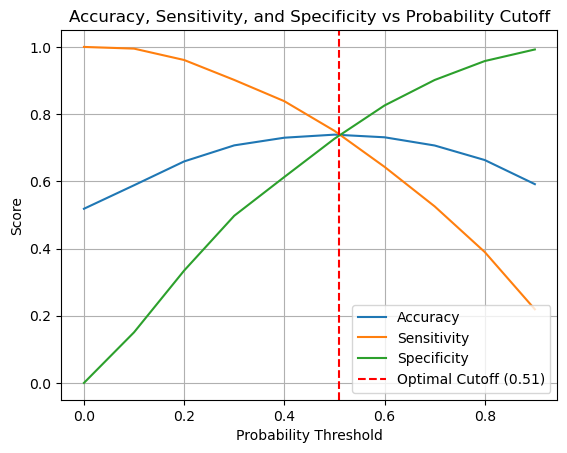

In [189]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.axvline(x=0.51, color='red', linestyle='--', label='Optimal Cutoff (0.51)')
plt.title("Accuracy, Sensitivity, and Specificity vs Probability Cutoff")
plt.xlabel("Probability Threshold")
plt.ylabel("Score")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

After plotting the Accuracy, Sensitivity, and Specificity at different values of probability cutoffs to evaluate the model's performance across thresholds, 0.51 was the  optimal threshold based on the graph above.

At 0.51, it provides a balanced trade-off between sensitivity and specificity, while also aligning closely with the point of highest overall accuracy.

So, we are changing the default cutoff from 0.5 to 0.51 which helps in improving classification performance by maintaining a good balance between correctly identifying both positive and negative classes.

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [192]:
# Create a column for final prediction based on the optimal cutoff
y_train_pred_final['Final Prediction'] = y_train_pred_final['Predicted Probability of Staying'].map( lambda x: 1 if x > 0.51 else 0)

y_train_pred_final.head()

Actual Stayed  Predicted Probability of Staying  Predicted  0.0  0.1  \
47704              1                          0.976117          1    1    1   
59804              0                          0.290127          0    1    1   
40275              1                          0.844811          1    1    1   
34096              0                          0.052935          0    1    0   
2598               1                          0.472410          0    1    1   

       0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Final Prediction  
47704    1    1    1    1    1    1    1    1                 1  
59804    1    0    0    0    0    0    0    0                 0  
40275    1    1    1    1    1    1    1    0                 1  
34096    0    0    0    0    0    0    0    0                 0  
2598     1    1    1    0    0    0    0    0                 0

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [194]:
# Calculate the accuracy
metrics.accuracy_score(y_train_pred_final['Actual Stayed'], y_train_pred_final['Final Prediction'])

0.7392387122899372

After changing the default cutoff from 0.5 to 0.51 the accuracy score is now 73.92% on the training dataset which indicates that the model correctly predicts the employee retention class ("Stayed" or "Left") in approximately 74% of the cases. 

The model is slightly improved (from the previous accuracy score of 73.89%) and continues to perform reasonably well in distinguishing between employees who stay and those who leave.

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [196]:
# Create the confusion matrix once again
confusion=metrics.confusion_matrix(y_train_pred_final['Actual Stayed'],y_train_pred_final['Final Prediction'])
print(confusion)

[[17399  6390]
 [ 6489 19112]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [198]:
# Create variables for true positive, true negative, false positive and false negative
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [200]:
# Calculate Sensitivity
sensitivity=TP/(TP+FN)
print(sensitivity)

0.7465333385414632


After changing the default cutoff from 0.5 to 0.51 the sensitivity is now 74.65% which indicates that the model correctly identifies approximately 75% of the employees who stayed, but it misses 25% of them (i.e. false negatives).

There is a slight decrease from the previous sensitivity of 75.02% but it is still high which indicates the model continues to capture most of the staying employees.

In [202]:
# Calculate Specificity
specificity=TN/(TN+FP)
print(specificity)

0.7313884568498046


After changing the default cutoff from 0.5 to 0.51 the specificity is now 73.14% which indicates that the model correctly identifies about 73% of the employees who left, while 27% are incorrectly predicted as staying (i.e. false positives).

The model is slightly improved (from the previous specificity of 72.67%) and is now better at identifying employees who left.

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [204]:
# Calculate Precision
precision=TP/(TP+FP)
print(precision)

0.7494314171437534


After changing the default cutoff from 0.5 to 0.51 the precision is now 74.94% which indicates that around 75% of the employees predicted to stay are actually correct, while 25% are false positives (employees who actually left but were predicted to stay).

The model is slightly improved (from the previous precision of 74.71%) and now there are fewer false positives (i.e. fewer "left" employees incorrectly predicted as "stayed").

In [206]:
# Calculate Recall
recall=TP/(TP+FN)
print(recall)

0.7465333385414632


After changing the default cutoff from 0.5 to 0.51 the recall (same as sensitivity) is now 74.65% which indicates that the model correctly identifies approximately 75% of the employees who stayed, but it misses 25% of them (i.e. false negatives).

Same as in the case of sensitivity, there is a slight decrease from the previous recall of 75.02%, but it still remains robust, indicating that the model still effectively captures the majority of employees who stayed.

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [208]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [210]:
# Check actual and predicted values from initial model
y_train_pred_final[['Actual Stayed', 'Predicted']].head()

Actual Stayed  Predicted
47704              1          1
59804              0          0
40275              1          1
34096              0          0
2598               1          0

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

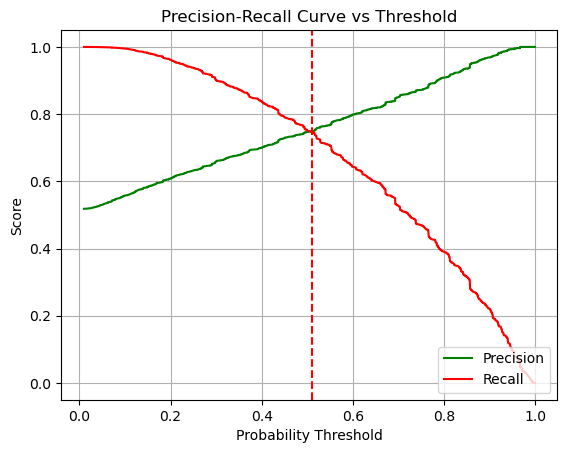

In [247]:
# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Actual Stayed'], y_train_pred_final['Predicted Probability of Staying'])
plt.plot(thresholds, precision[:-1], "g-", label='Precision')
plt.plot(thresholds, recall[:-1], "r-", label='Recall')
plt.axvline(x=0.51, color='red', linestyle='--')
plt.title("Precision-Recall Curve vs Threshold")
plt.xlabel("Probability Threshold")
plt.ylabel("Score")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

As the probability threshold increases, precision increases because the model becomes more conservative in predicting positive cases (i.e., it generates fewer false positives).

On the other hand, recall decreases with higher thresholds, as the model may miss more true positive cases (i.e., it produces more false negatives).

The precision (red) and recall (green) curves intersect around a threshold of around 0.51, indicating a balanced trade-off point between correctly identifying true positives and minimizing false positives.

The fact that the ROC curve and the Precision-Recall curve suggest the same cutoff i.e. 0.51 indicates that the model achieves a well-balanced trade-off between sensitivity, specificity, and precision at this threshold and is well-calibrated, and both evaluation methods agree on what threshold balances performance best. This alignment across evaluation metrics indicates consistent and reliable performance.

So we are keeping the optimal cutoff as 0.51 itself based on the ROC and Precision-Recall curves. This thershold maximizes both sensitivity and precision, making sure we have a reliable classification performance.

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [214]:
# Select the relevant features for validation set

X_validation_rfe = X_validation[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [216]:
# Add constant to X_validation

X_validation_rfe_sm=sm.add_constant(X_validation_rfe)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [218]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'

y_validation_pred=logmodel1result.predict(X_validation_rfe_sm)

# View predictions
y_validation_pred.head()

7460     0.620401
59074    0.439491
59735    0.147389
42965    0.209868
43114    0.702721
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [220]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability=pd.DataFrame({"Predicted Probability of Staying":y_validation_pred})
# Convert 'y_validation' to DataFrame 'actual'
actual=pd.DataFrame({"Actual Stayed":y_validation})
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
actual = actual.reset_index(drop=True)
predicted_probability = predicted_probability.reset_index(drop=True)
y_validation_pred_final = pd.concat([actual, predicted_probability], axis=1)

In [222]:
y_validation_pred_final.head()

Actual Stayed  Predicted Probability of Staying
0              0                          0.620401
1              0                          0.439491
2              1                          0.147389
3              0                          0.209868
4              0                          0.702721

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [224]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_validation_pred_final['Predicted']=y_validation_pred_final["Predicted Probability of Staying"].map(lambda x: 1 if x>0.51 else 0)
# Check the DataFrame
y_validation_pred_final.head()

Actual Stayed  Predicted Probability of Staying  Predicted
0              0                          0.620401          1
1              0                          0.439491          0
2              1                          0.147389          0
3              0                          0.209868          0
4              0                          0.702721          1

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [226]:
# Calculate the overall accuracy
metrics.accuracy_score(y_validation_pred_final['Actual Stayed'], y_validation_pred_final['Predicted'])

0.7337962962962963

The accuracy score of 73.38% on the validation dataset indicates that the model correctly predicted the employee retention class ("Stayed" or "Left") in approximately 73% of the cases. 

There is a slight decrease from the training accuracy of 73.92% but the model continues to perform reasonably well in distinguishing between employees who stay and those who leave.

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [228]:
# Create confusion matrix
confusion=metrics.confusion_matrix(y_validation_pred_final['Actual Stayed'],y_validation_pred_final['Predicted'])
print(confusion)

[[7233 2765]
 [2870 8300]]


In [230]:
# Create variables for true positive, true negative, false positive and false negative
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [232]:
# Calculate sensitivity
sensitivity=TP/(TP+FN)
print(sensitivity)

0.7430617726051925


The sensitivity of 74.31% on the validation dataset indicates that the model correctly identified approximately 74% of the actual positive cases (i.e. employees who stayed), but it missed 26% of the employees who stayed (i.e. false negatives).

There is a slight decrease from the training sensitivity of 74.65% but it is still high which indicates the model continues to capture most of the staying employees.

In [234]:
# Calculate specificity
specificity=TN/(TN+FP)
print(specificity)

0.7234446889377876


The specificity of 72.34% on the validation dataset indicates that the model correctly identified approximately 72% of the actual negative cases (i.e. employees who left the company), but 28% of the employees who left were incorrectly predicted as staying (i.e. false positives).

There is a slight decrease from the training specifiicty of 73.14% but it still remains fairly consistent.

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [236]:
# Calculate precision
precision=TP/(TP+FP)
print(precision)

0.7501129688206055


The precision of 75.01% on the validation dataset indicates that the model correctly identified approximately 75% of the actual positive cases (i.e. employees who stayed), but it incorrectly identified 25% of the employees who actually left as staying (i.e. false positives).

The model is slightly improved from the training precision of 74.94% and now there are fewer false positives (i.e. fewer "left" employees incorrectly predicted as "stayed").

In [238]:
# Calculate recall
recall=TP/(TP+FN)
print(recall)

0.7430617726051925


The recall of 74.31% on the validation dataset indicates that the model correctly identified approximately 74% of the actual positive cases (i.e. employees who stayed), but it missed 26% of the employees who stayed (i.e. false negatives).

Same as in the case of sensitivity, there is a slight decrease from the previous recall of 74.65%, but it still remains robust, indicating that the model still effectively captures the majority of employees who stayed.

## Conclusion



It is of note that the model demonstrates consistent and balanced performance across both the train and validation datasets. 

On the train set, the model achieves a sensitivity of 74.65%, a specificity of 73.14%, and a precision of 74.94%. 

Similarly, on the validation set, the sensitivity is 74.31%, specificity is 72.34%, and precision is 75.01%. 

These results indicate that the model generalizes well and is effective at identifying both employees likely to stay and those likely to leave, without signs of overfitting.

Although there are some slight drops in the performance metrics on the validation set when compared to training dataset, the differences are marginal and are expected. This consistency confirms the model’s generalizability and stability.

Overall, the model can serve as a useful predictive tool for identifying employee retention trends, and can potentially assist the HR team in making data-driven decisions to improve employee engagement and reduce attrition and the company can refine its retention strategies, foster a more supportive work environment and enhance workforce stability and satisfaction.

The model effectively identifies factors that influence employee retention and attrition with consistent performance across both training and validation datasets.

We noted that Remote work opportunities and higher job levels are strong predictors of retention and PhD holders and male employees also show a higher likelihood of staying.

On the other hand, Poor or even fair work-life balance, low or very high job satisfaction, and frequent overtime are linked to higher attrition — likely indicating burnout or disengagement and Single employees, those with lower performance ratings, and perceptions of a poor company reputation also correlate strongly with leaving.

Steps that the HR team could take include:
- Encouraging flexible work arrangements such as remote or hybrid models.
- Providing career advancement opportunities or clear career progression pathways to retain top talent while supporting underperformers with development plans.
- Addressing the needs of single employees who may feel less anchored to the organization.
- Investing in work-life balance initiatives which include manageable workloads and wellness programs.
- Rethinking overtime policies and monitoring high-performing but overworked employees for signs of burnout.
- Improving internal communication and branding to enhance the company’s perceived reputation.
- Checking employee satisfaction regularly through quick surveys and taking action quickly if a drop is noticed.

With over 74% sensitivity and precision on both training and validation datasets, the model demonstrates strong predictive power and generalizability, making it a reliable tool for proactive employee retention strategies.

Thank you for reviewing this analysis!